In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='white')
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

# **Importing Dataset**

In [4]:
# Get the Data

pd.set_option('display.max_columns', None) #set to display all columns
path = "C:/Users/micky/Downloads/Employee-Attrition.csv"
df = pd.read_csv(path)
display(df.head())

display(df.describe().T)

df.info()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Check if there is null values and Duplicates

In [5]:
display(df.isna().sum())
df.duplicated().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

0

In [6]:
# Checking the Data types of columns

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Converting 'Attrition' column to numeric format

df['Attrition1'] = df['Attrition'].map({'No': 0, 'Yes': 1})

In [8]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Create a new DataFrame containing only categorical variables
categorical_df = df[categorical_columns.columns]

display(categorical_df.head())

# Select only categorical columns
numerical_columns = df.select_dtypes(include=['int64'])

# Create a new DataFrame containing only numerical variables
numerical_df = df[numerical_columns.columns]

numerical_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition1
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0


In [9]:
# Calculate correlations between 'Attrition1' and other numerical variables

correlation_matrix = df.corr()

# Display correlations with 'Attrition1'

attrition_correlation = correlation_matrix['Attrition1'].sort_values(ascending=False)
print(attrition_correlation)

Attrition1                  1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

C:\Users\micky\AppData\Local\Temp\ipykernel_33832\4100460517.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Positive Correlations:
DistanceFromHome: There is a weak positive correlation (0.077924) between the distance an employee lives from home and the likelihood of attrition. This suggests that employees who live farther from the workplace might be slightly more likely to leave.
NumCompaniesWorked: There is a very weak positive correlation (0.043494) between the number of companies an employee has worked for and attrition. This suggests that employees with more job changes might be slightly more likely to leave.


Near-Zero Correlations:
MonthlyRate: There is a very weak positive correlation (0.015170) between the monthly rate of pay and attrition. However, the correlation is quite low, indicating that there's not much of a relationship between these variables.


No Significant Correlations:
Most of the variables, such as "PerformanceRating," "HourlyRate," "EmployeeNumber," "PercentSalaryHike," "Education," etc., have correlations close to zero with attrition. This suggests that these variables are not strongly related to the likelihood of attrition.

Negative Correlations:
There are several variables with negative correlations with "Attrition." Negative correlations suggest that as the value of one variable increases, the likelihood of attrition tends to decrease.
Age: There is a moderate negative correlation (-0.159205) between age and attrition. Older employees might be less likely to leave the company.
YearsAtCompany: There is a moderate negative correlation (-0.134392) between the number of years an employee has been at the company and attrition. Employees who have been with the company for a longer time might be less likely to leave.
JobLevel, TotalWorkingYears, MonthlyIncome: These variables also have moderate to strong negative correlations with attrition. Employees with higher job levels, more total working years, and higher monthly incomes are less likely to leave.


Interpret with Caution:
The NaN (Not a Number) values for "EmployeeCount" and "StandardHours" suggest that these variables might not have meaningful variations or might not be appropriately represented in the dataset, potentially due to constant values or missing data.
In summary, this correlation matrix suggests that attributes like age, years at the company, job level, total working years, monthly income, distance from home, and the number of companies worked for are more closely related to the likelihood of attrition. However, correlation does not imply causation, and it's important to consider other factors and conduct further analysis to make accurate conclusions about the drivers of attrition in your dataset.

# Using Heatmap to check for Correlation of numeric features

C:\Users\micky\AppData\Local\Temp\ipykernel_33832\6185054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=.5, linewidths=.2, cmap='YlGnBu')


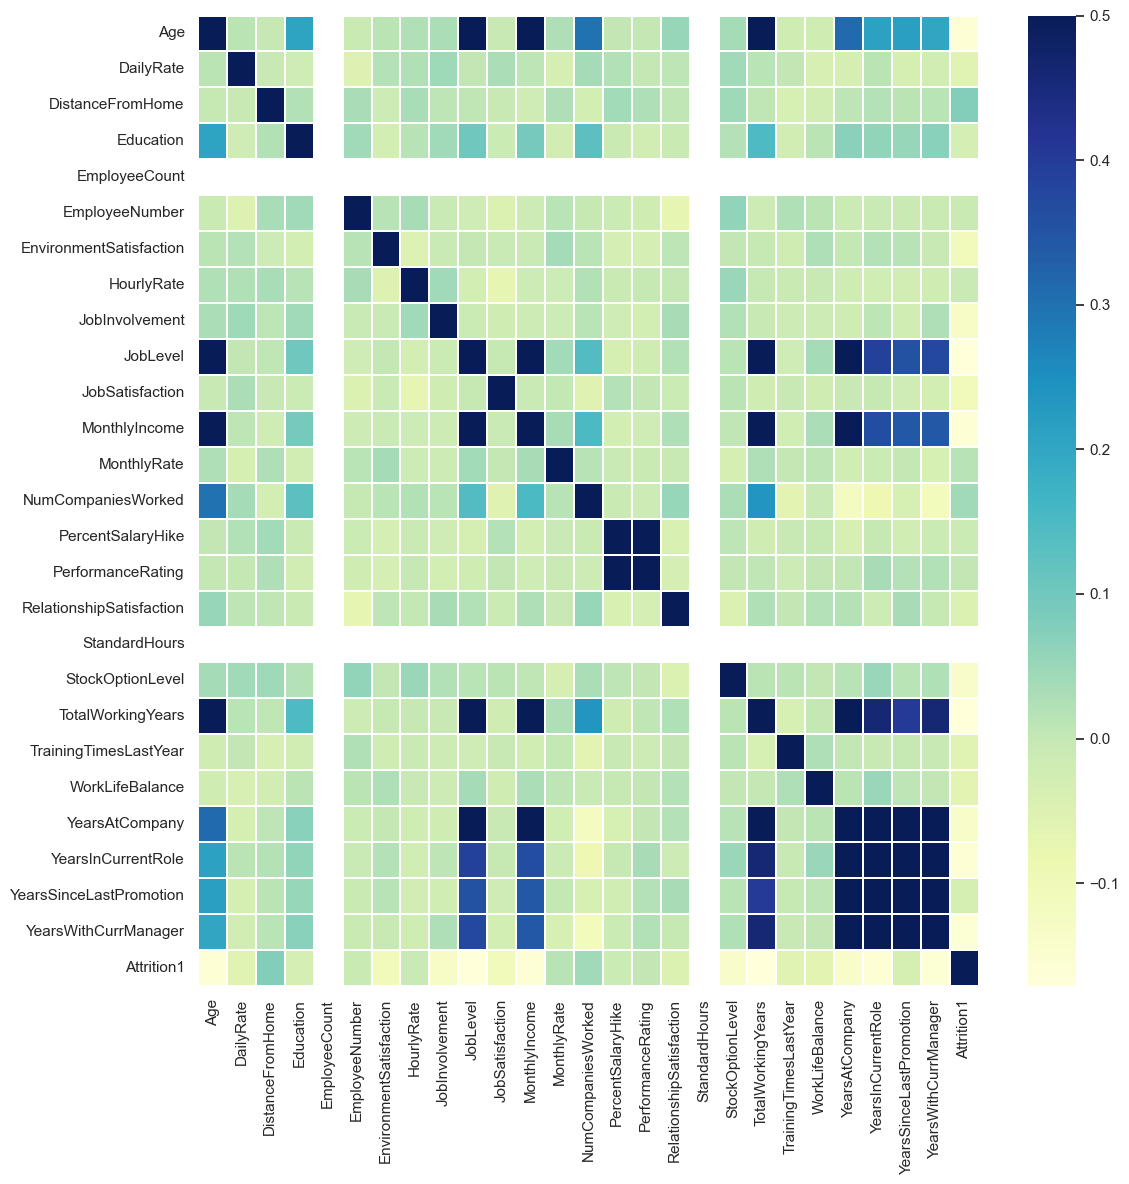

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=.5, linewidths=.2, cmap='YlGnBu')
plt.tight_layout()
plt.show()

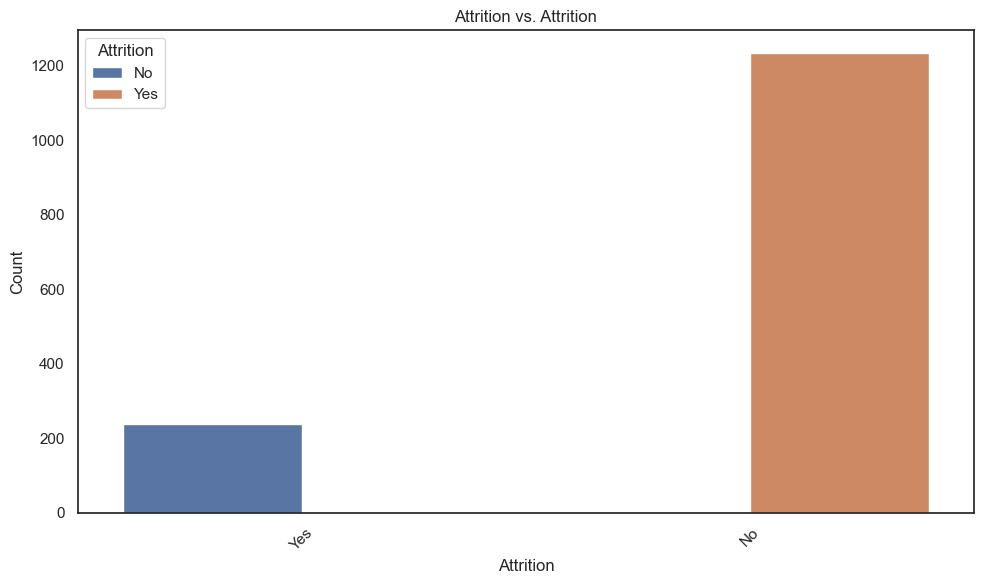

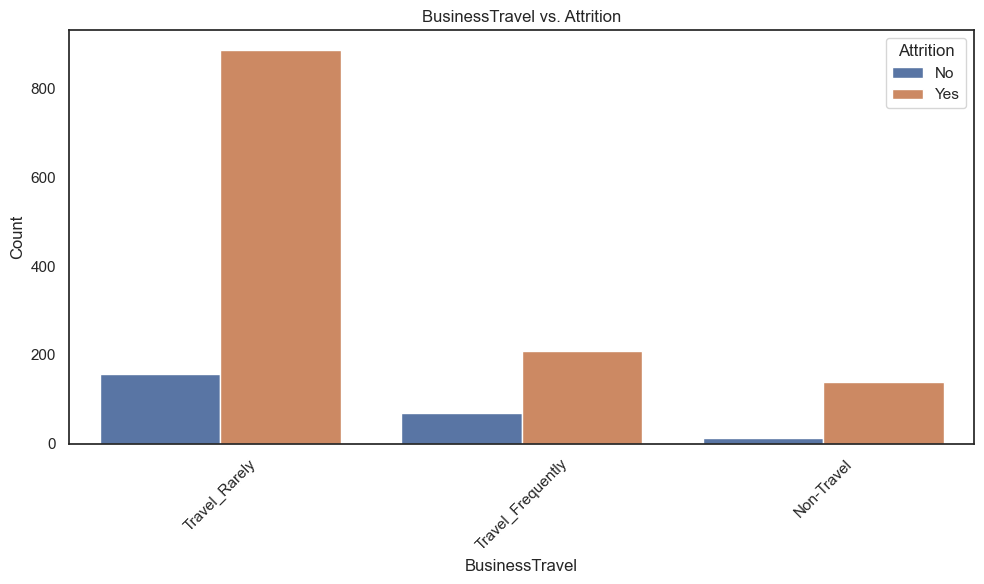

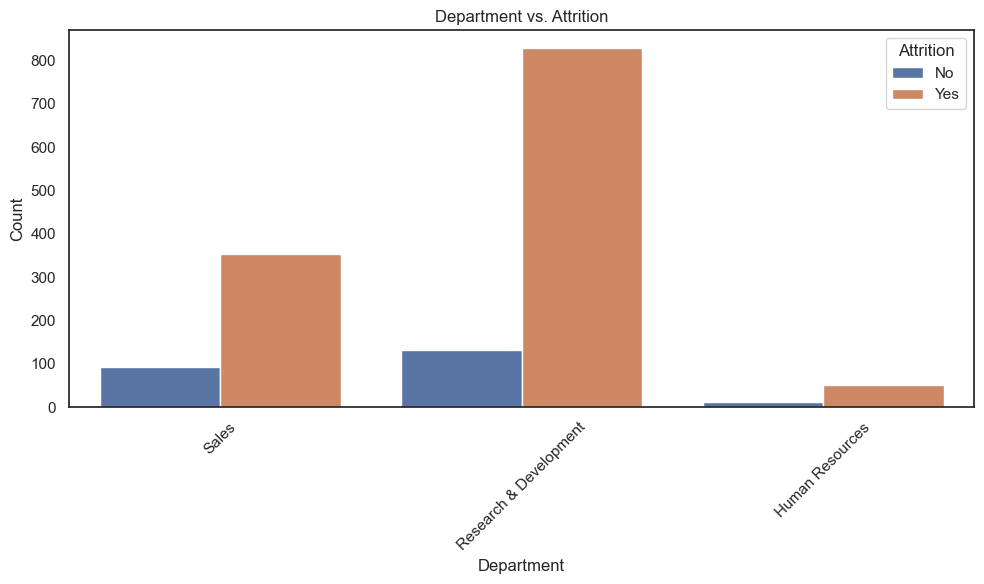

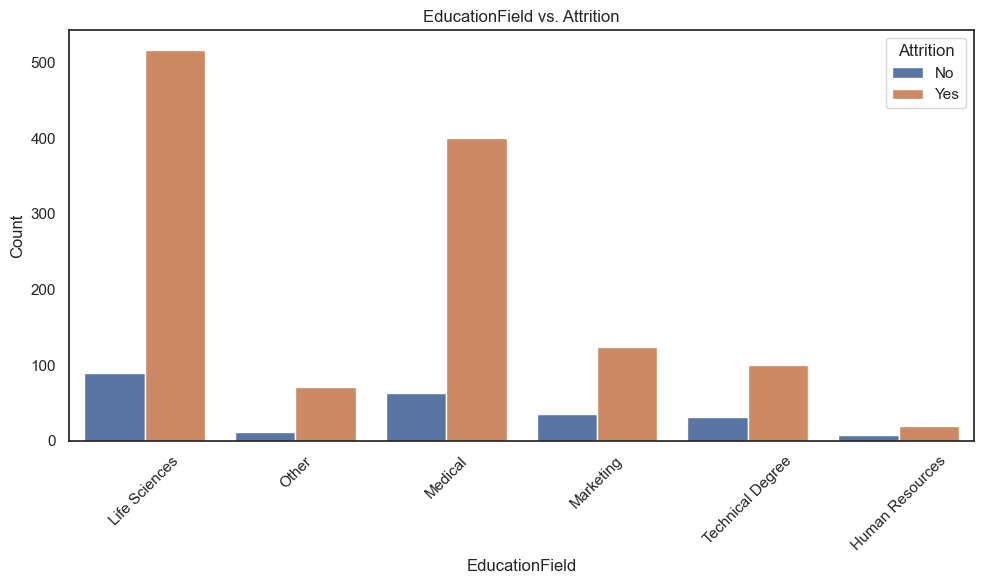

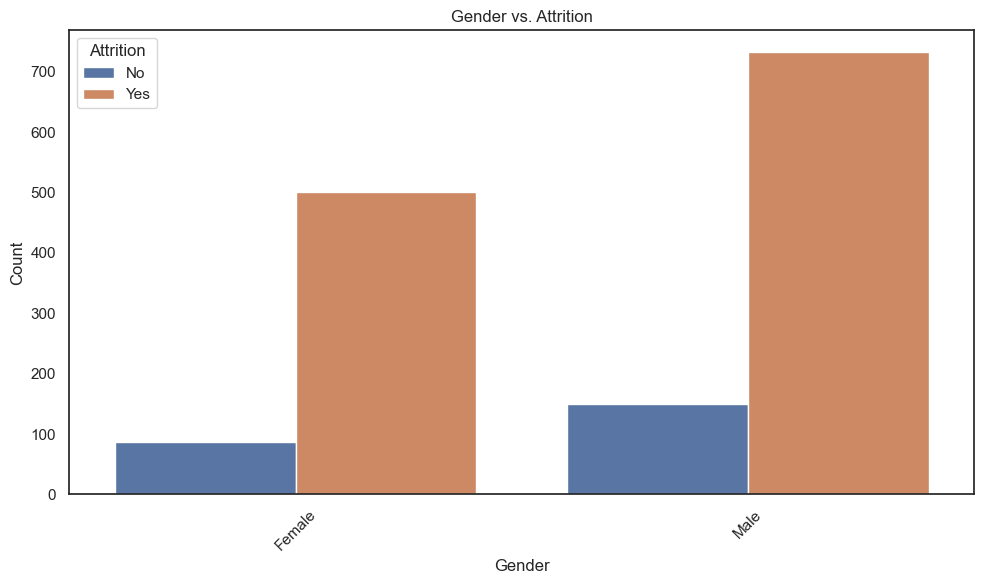

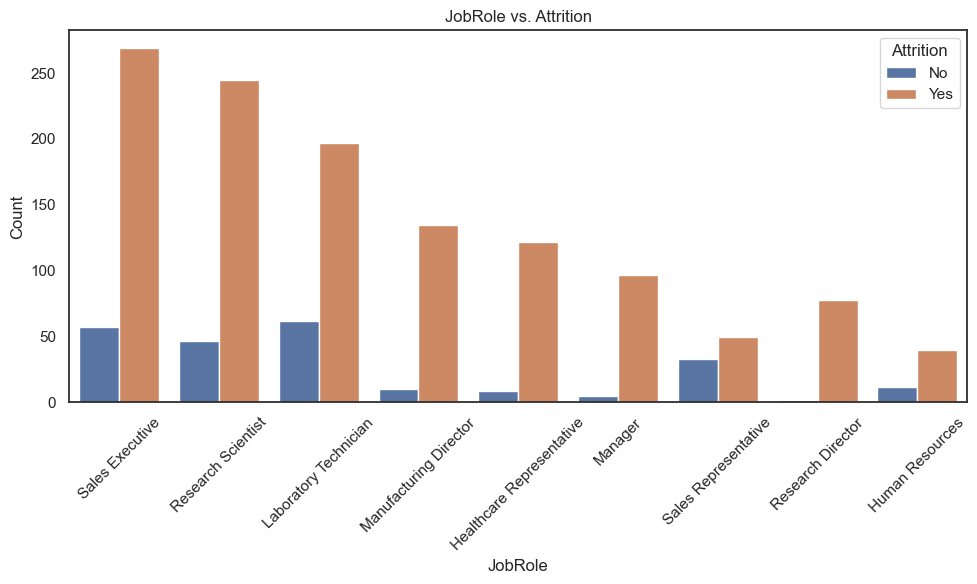

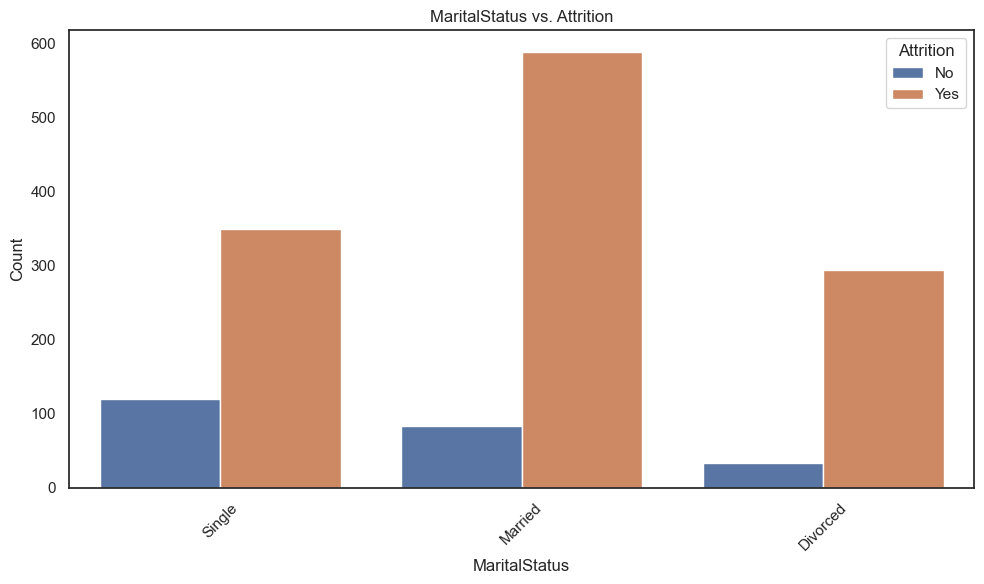

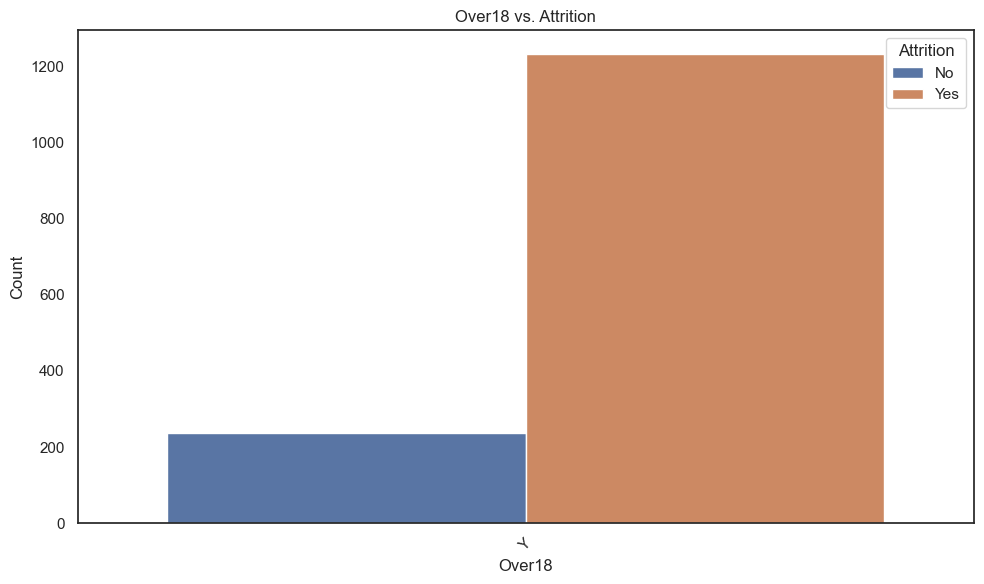

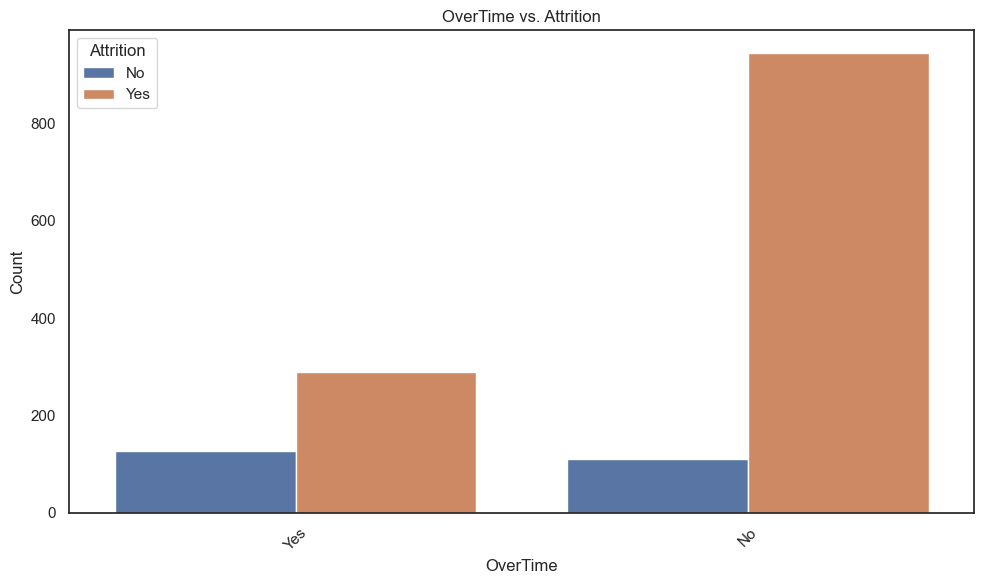

In [11]:
# Create Side-by-side bar plots for each categorical column

for column in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, hue='Attrition')
    plt.title(f'{column} vs. Attrition')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Attrition', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:

#%pip install scipy.stats
from scipy.stats import chi2_contingency
# Conducting chi-squared test for each categorical column
for column in categorical_columns:
    contigency_table = pd.crosstab(df[column], df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contigency_table)
    
    print(f'Chi-squared test results for {column}:')
    print(f'Chi-squared statistic: {chi2}')
    print(f'p-value: {p}')
    print(f'Degrees of freedom: {dof}')
    print('Expected frequencies:')
    print(expected)
    print('-' * 40)

Chi-squared test results for Attrition:
Chi-squared statistic: 1462.6145539474094
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[1034.21020408  198.78979592]
 [ 198.78979592   38.21020408]]
----------------------------------------
Chi-squared test results for BusinessTravel:
Chi-squared statistic: 24.182413685655174
p-value: 5.608614476449931e-06
Degrees of freedom: 2
Expected frequencies:
[[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]
----------------------------------------
Chi-squared test results for Department:
Chi-squared statistic: 10.79600732241067
p-value: 0.004525606574479634
Degrees of freedom: 2
Expected frequencies:
[[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]
----------------------------------------
Chi-squared test results for EducationField:
Chi-squared statistic: 16.024674119585427
p-value: 0.006773980139025213
Degrees of freedom: 5
Expected frequencies:
[[ 22.64693878   4.3

The chi-squared is interpreted using the p-value. A low p-value(close to zero) suggest that there is a significant association, while a high p-value suggest that there is no significant association.

From the output above, Business Travel, Department, Education field, Job role, Marital status and Overtime all have p-value close to zero. This suggest a significant association of these factors to attrition.

In [13]:
# Dropping redundant columns with NaN correlation with attrition

columns_to_drop = ['EmployeeCount', 'StandardHours',"PerformanceRating", "HourlyRate", "EmployeeNumber", "PercentSalaryHike", "Education", 'Over18', 'Gender']

# Create a new Dataframe without the dropped columns
df_modified = df.drop(columns=columns_to_drop, axis=1)

# Display the modified DataFrame
display(df_modified.describe().T)

df_modified.head()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.5,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition1
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,3,2,Sales Executive,4,Single,5993,19479,8,Yes,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,2,2,Research Scientist,2,Married,5130,24907,1,No,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,3,1,Research Scientist,3,Married,2909,23159,1,Yes,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,3,1,Laboratory Technician,2,Married,3468,16632,9,No,4,1,6,3,3,2,2,2,2,0


In [14]:
# Dropping redundant columns with NaN correlation with attrition
columns_to_drop = ['Attrition']

# Create a new Dataframe without the dropped columns
df_modified = df_modified.drop(columns=columns_to_drop, axis=1)

# Select only categorical columns
categoric_columns = df_modified.select_dtypes(include=['object'])

# Create a new DataFrame containing only categorical variables
categoric_df = df_modified[categoric_columns.columns]

display(categorical_df.head())
display(df_modified.shape)

# Select only categorical columns
numeric_columns = df_modified.select_dtypes(include=['int64'])

# Create a new DataFrame containing only numerical variables
numeric_df = df_modified[numeric_columns.columns]

numeric_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


(1470, 26)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition1
0,41,1102,1,2,3,2,4,5993,19479,8,1,0,8,0,1,6,4,0,5,1
1,49,279,8,3,2,2,2,5130,24907,1,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,4,2,1,3,2090,2396,6,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,3,1,3,2909,23159,1,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,3,1,2,3468,16632,9,4,1,6,3,3,2,2,2,2,0


In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#List of categorical columns
categorical_columns= ['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus','OverTime']

#List of numeric columns
numerical_columns = [col for col in df_modified.columns if col not in categorical_columns]

#Perform One-Hot Encoding only on the categorical columns
encoded = pd.get_dummies(df_modified[categorical_columns], drop_first=True)

#Combined the encoded categorical columns with the original numeric columns
final_df = pd.concat([df_modified[numerical_columns], encoded], axis=1)

display(final_df.shape)
print(final_df.head())


(1470, 40)

   Age  DailyRate  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  \
0   41       1102                 1                        2               3   
1   49        279                 8                        3               2   
2   37       1373                 2                        4               2   
3   33       1392                 3                        4               3   
4   27        591                 2                        1               3   

   JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0         2                4           5993        19479                   8   
1         2                2           5130        24907                   1   
2         1                3           2090         2396                   6   
3         1                3           2909        23159                   1   
4         1                2           3468        16632                   9   

   RelationshipSatisfaction  StockOpti

In [16]:
#Separate target variable
X = final_df.drop(columns=['Attrition1'])
y = final_df['Attrition1']

# Initialize RFE with RandomForestClassifier as estimator
estimator = RandomForestClassifier()  # You can replace this with your chosen estimator
rfe = RFE(estimator, n_features_to_select=15)  # Choose the number of features to select

# Fit RFE on the transformed data
rfe.fit(X, y)

# Selected features after RFE
selected_features = X.columns[rfe.support_]

print('Selected features after RFE')
print(selected_features)

Selected features after RFE
Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'OverTime_Yes'],
      dtype='object')


In [17]:
selected = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'OverTime_Yes']
final = final_df[selected]

final.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.5,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
